In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
uncleaned=pd.read_csv('Original.csv',index_col=0)
uncleaned.head()

,Age,Female,Racegrp,Educ,Unmarried,Income,CareSource,Insured,Weight,Height,BMI,Obese,Waist,SBP,DBP,HDL,LDL,Total Chol,Dyslipidemia,PVD,Activity,PoorVision,Smoker,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65,1,white,0.0,0.0,1.0,other,1.0,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,297.0,0,0,3.0,0.0,1,0.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0
2,36,1,hispa,0.0,NaN,1.0,noplace,0.0,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,166.0,0,0,3.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,66,1,white,0.0,1.0,0.0,noplace,1.0,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,255.0,1,0,1.0,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,54,1,white,1.0,0.0,0.0,DrHMO,1.0,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,230.0,0,0,2.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,63,1,black,0.0,0.0,NaN,clinic,1.0,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,221.0,0,0,1.0,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8819 entries, 1 to 8819
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               8819 non-null   int64  
 1   Female            8819 non-null   int64  
 2   Racegrp           8819 non-null   object 
 3   Educ              8799 non-null   float64
 4   Unmarried         8367 non-null   float64
 5   Income            7653 non-null   float64
 6   CareSource        8819 non-null   object 
 7   Insured           8706 non-null   float64
 8   Weight            8625 non-null   float64
 9   Height            8628 non-null   float64
 10  BMI               8529 non-null   float64
 11  Obese             8529 non-null   float64
 12  Waist             8505 non-null   float64
 13  SBP               8511 non-null   float64
 14  DBP               8439 non-null   float64
 15  HDL               8802 non-null   float64
 16  LDL               8801 non-null   float64


In [45]:
# drop all the missing rows

In [46]:
drop_all=uncleaned.dropna(axis=0)
drop_all.shape

(4136, 33)

In [47]:
objects_cols=drop_all.select_dtypes(include='object').columns
objects_cols

Index(['Racegrp', 'CareSource'], dtype='object')

In [48]:
original=pd.get_dummies(data=drop_all,columns=objects_cols,drop_first=True)
original.head()

,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,Obese,Waist,SBP,DBP,HDL,LDL,Total Chol,Dyslipidemia,PVD,Activity,PoorVision,Smoker,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD,Racegrp_hispa,Racegrp_other,Racegrp_white,CareSource_DrHMO,CareSource_clinic,CareSource_noplace,CareSource_other
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65,1,0.0,0.0,1.0,1.0,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,297.0,0,0,3.0,0.0,1,0.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1
3,66,1,0.0,1.0,0.0,1.0,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,255.0,1,0,1.0,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0
4,54,1,1.0,0.0,0.0,1.0,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,230.0,0,0,2.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0
6,26,0,1.0,0.0,0.0,1.0,119.3,193.2,31.96,1.0,117.9,129.0,70.0,43.0,159.0,202.0,0,0,2.0,0.0,0,0.0,1,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,1,0,0,0
7,66,0,1.0,0.0,0.0,0.0,85.1,172.1,28.73,0.0,99.2,137.0,92.0,41.0,143.0,184.0,0,0,3.0,0.0,0,1.0,0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0


In [324]:
original.shape

(4136, 38)

In [4]:
original=pd.read_csv('4163.csv',index_col=0)
original.head()

,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,Obese,Waist,SBP,DBP,HDL,LDL,Total.Chol,Dyslipidemia,PVD,Activity,PoorVision,Smoker,Hypertension,Fam.Hypertension,Diabetes,Fam.Diabetes,Stroke,CVD,Fam.CVD,CHF,Anemia,CKD,Racegrpblack,Racegrphispa,Racegrpother,Racegrpwhite,CareSourceclinic,CareSourceDrHMO,CareSourcenoplace,CareSourceother
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65,1,0,0,1,1,56.0,162.1,21.31,0,83.6,135,71,48,249,297,0,0,3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,66,1,0,1,0,1,83.9,162.5,31.77,1,113.2,115,57,44,211,255,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,54,1,1,0,0,1,69.4,160.5,26.94,0,77.9,110,57,74,156,230,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6,26,0,1,0,0,1,119.3,193.2,31.96,1,117.9,129,70,43,159,202,0,0,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
7,66,0,1,0,0,0,85.1,172.1,28.73,0,99.2,137,92,41,143,184,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [5]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4136 entries, 1 to 6000
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                4136 non-null   int64  
 1   Female             4136 non-null   int64  
 2   Educ               4136 non-null   int64  
 3   Unmarried          4136 non-null   int64  
 4   Income             4136 non-null   int64  
 5   Insured            4136 non-null   int64  
 6   Weight             4136 non-null   float64
 7   Height             4136 non-null   float64
 8   BMI                4136 non-null   float64
 9   Obese              4136 non-null   int64  
 10  Waist              4136 non-null   float64
 11  SBP                4136 non-null   int64  
 12  DBP                4136 non-null   int64  
 13  HDL                4136 non-null   int64  
 14  LDL                4136 non-null   int64  
 15  Total.Chol         4136 non-null   int64  
 16  Dyslipidemia       4136 

In [6]:
original.describe()

,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,Obese,Waist,SBP,DBP,HDL,LDL,Total.Chol,Dyslipidemia,PVD,Activity,PoorVision,Smoker,Hypertension,Fam.Hypertension,Diabetes,Fam.Diabetes,Stroke,CVD,Fam.CVD,CHF,Anemia,CKD,Racegrpblack,Racegrphispa,Racegrpother,Racegrpwhite,CareSourceclinic,CareSourceDrHMO,CareSourcenoplace,CareSourceother
count,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000
mean,47.891683,0.516441,0.472437,0.347921,0.446325,0.810203,79.562539,167.770938,28.200885,0.309961,96.839217,124.279014,71.720986,51.715184,152.265474,203.980658,0.103723,0.034091,2.038685,0.053675,0.305368,0.378385,0.253143,0.104207,0.313346,0.024420,0.056093,0.355899,0.022244,0.018859,0.064313,0.164652,0.273211,0.029981,0.532157,0.208656,0.594052,0.150387,0.046663
std,18.191534,0.499790,0.499300,0.476368,0.497171,0.392188,19.183630,10.021063,6.108823,0.462533,15.156713,20.036110,12.159580,15.712890,42.278001,42.018176,0.304938,0.181485,0.804132,0.225403,0.460619,0.485043,0.434865,0.305566,0.463910,0.154367,0.230129,0.478843,0.147493,0.136043,0.245340,0.370911,0.445662,0.170555,0.499025,0.406397,0.491134,0.357493,0.210942
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.500000,130.400000,14.420000,0.000000,58.600000,73.000000,10.000000,8.000000,42.000000,75.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,1.000000,65.875000,160.500000,24.080000,0.000000,86.100000,110.000000,64.000000,40.000000,123.000000,177.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,1.000000,0.000000,0.000000,0.000000,1.000000,77.400000,167.450000,27.295000,0.000000,96.500000,121.000000,72.000000,49.000000,149.000000,200.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,63.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.025000,174.900000,31.152500,1.000000,106.125000,134.000000,79.000000,60.000000,177.000000,229.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,193.300000,200.100000,66.440000,1.000000,173.400000,218.000000,122.000000,160.000000,560.000000,606.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# explore continious variable

In [49]:
cols=[]
for col in original.columns:
    if len(original[col].unique())>2:
        cols.append(col)

In [50]:
# find the cat from continious
uniq_len=[len(original[col].unique()) for col in cols]
print(uniq_len)

[66, 928, 489, 1870, 708, 127, 94, 102, 249, 249, 4]


In [51]:
no_contin=cols[uniq_len.index(4)]
print(no_contin)
print(original[no_contin])

Activity
ID
1       3.0
3       1.0
4       2.0
6       2.0
7       3.0
       ... 
5996    2.0
5997    2.0
5998    1.0
5999    1.0
6000    2.0
Name: Activity, Length: 4136, dtype: float64


In [52]:
# copy a new df for preprocessing
df_pre=original.copy()
df_pre['Activity']=df_pre[no_contin].replace({1:0,2:0,3:1,4:1})
print(df_pre.Activity)

ID
1       1.0
3       0.0
4       0.0
6       0.0
7       1.0
       ... 
5996    0.0
5997    0.0
5998    0.0
5999    0.0
6000    0.0
Name: Activity, Length: 4136, dtype: float64


In [53]:
conti_cols=cols[:-1]

In [54]:
for col in conti_cols:
    df_pre[col]=pd.qcut(df_pre[col],q=2,labels=[0,1])

In [55]:
print(df_pre[conti_cols])

     Age Weight Height BMI Waist SBP DBP HDL LDL Total Chol
ID                                                         
1      1      0      0   0     0   1   0   0   1          1
3      1      1      0   1     1   0   0   0   1          1
4      1      0      0   0     0   0   0   1   1          1
6      0      1      1   1     1   1   0   0   1          1
7      1      1      1   1     1   1   1   0   0          0
...   ..    ...    ...  ..   ...  ..  ..  ..  ..        ...
5996   1      1      1   1     1   1   1   0   1          1
5997   1      1      1   1     1   1   1   0   0          0
5998   0      1      1   0     0   1   1   0   0          0
5999   1      1      1   0     1   1   0   1   0          0
6000   0      0      0   0     0   0   0   1   0          0

[4136 rows x 10 columns]


In [21]:
df_pre.head()

,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,Obese,Waist,SBP,DBP,HDL,LDL,Total.Chol,Dyslipidemia,PVD,Activity,PoorVision,Smoker,Hypertension,Fam.Hypertension,Diabetes,Fam.Diabetes,Stroke,CVD,Fam.CVD,CHF,Anemia,CKD,Racegrpblack,Racegrphispa,Racegrpother,Racegrpwhite,CareSourceclinic,CareSourceDrHMO,CareSourcenoplace,CareSourceother
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6,0,0,1,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
7,1,0,1,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

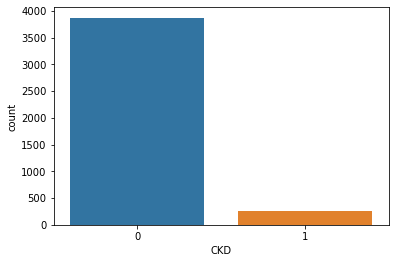

In [24]:
sns.countplot(x=df_pre['CKD'])
plt.show()

In [56]:
print(df_pre.CKD.value_counts()/len(df_pre.CKD))

0.0    0.935687
1.0    0.064313
Name: CKD, dtype: float64


In [57]:
# create probability function
def conditional_prob(df,cols):
    probs_1,probs_0=[],[]
    for col in cols:
        condition1=df[col]==1
        condition_1_p=df[condition1]['CKD'].mean()
        probs_1.append(condition_1_p)
        condition_0=df[col]==0
        condition_0_p=df[condition_0]['CKD'].mean()
        probs_0.append(condition_0_p)
        outcome=pd.DataFrame(list(zip(cols,probs_1,probs_0)), columns=['feature','Con_1_prob','Con_0_prob'])
    return outcome

In [58]:
cond_prob=conditional_prob(df_pre,df_pre.columns.drop('CKD')).reset_index(drop=True)
cond_prob.head(20)

,feature,Con_1_prob,Con_0_prob
0,Age,0.126754,0.006075
1,Female,0.066948,0.061500
2,Educ,0.047595,0.079285
3,Unmarried,0.081306,0.055247
4,Income,0.040628,0.083406
5,Insured,0.076694,0.011465
6,Weight,0.067247,0.061382
7,Height,0.058994,0.069632
8,BMI,0.070116,0.058511
9,Obese,0.072543,0.060617


In [59]:
# filter top 
cond_prob['lift']=cond_prob.apply(lambda row: row[1]/row[2],axis=1)
cond_prob.sort_values(by='lift',ascending=False)

,feature,Con_1_prob,Con_0_prob,lift
0,Age,0.126754,0.006075,20.865577
5,Insured,0.076694,0.011465,6.689380
21,Hypertension,0.134824,0.021392,6.302422
25,Stroke,0.297030,0.058488,5.078453
26,CVD,0.262931,0.052510,5.007233
17,PVD,0.269504,0.057071,4.722222
28,CHF,0.250000,0.060089,4.160494
11,SBP,0.101435,0.028842,3.516965
23,Diabetes,0.176334,0.051282,3.438515
19,PoorVision,0.166667,0.058508,2.848617


In [60]:
top_15_lift=cond_prob.sort_values(by='lift',ascending=False).iloc[0:15,0]
top_15_cond1=cond_prob.sort_values(by='Con_1_prob',ascending=False).iloc[0:15,0]
print(top_15_lift)
print(top_15_cond1)

0                  Age
5              Insured
21        Hypertension
25              Stroke
26                 CVD
17                 PVD
28                 CHF
11                 SBP
23            Diabetes
19          PoorVision
32       Racegrp_white
10               Waist
33    CareSource_DrHMO
29              Anemia
20              Smoker
Name: feature, dtype: object
25              Stroke
17                 PVD
26                 CVD
28                 CHF
23            Diabetes
19          PoorVision
21        Hypertension
0                  Age
29              Anemia
11                 SBP
32       Racegrp_white
10               Waist
20              Smoker
3            Unmarried
33    CareSource_DrHMO
Name: feature, dtype: object


In [61]:
common=set(top_15_cond1).intersection(set(top_15_lift))
cond_prob[cond_prob.iloc[:,0].isin(list(common))].sort_values(by='Con_1_prob',ascending=False)

,feature,Con_1_prob,Con_0_prob,lift
25,Stroke,0.297030,0.058488,5.078453
17,PVD,0.269504,0.057071,4.722222
26,CVD,0.262931,0.052510,5.007233
28,CHF,0.250000,0.060089,4.160494
23,Diabetes,0.176334,0.051282,3.438515
19,PoorVision,0.166667,0.058508,2.848617
21,Hypertension,0.134824,0.021392,6.302422
0,Age,0.126754,0.006075,20.865577
29,Anemia,0.102564,0.063578,1.613198
11,SBP,0.101435,0.028842,3.516965


In [62]:
# second filter
final_cols=top_15_cond1[:8]

In [63]:
# filter continious cols 
# Age is the only selected conti feature
set(conti_cols).intersection(set(final_cols))

{'Age'}

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [71]:
y=original.CKD.reset_index(drop=True)
x=original.drop('CKD',axis=1)[final_cols]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, stratify=y,test_size=0.2, random_state=42)

In [269]:
steps=[('preprocess',MinMaxScaler()),('clf',BalancedBaggingClassifier(random_state=42))]
pipeline=Pipeline(steps)

In [270]:
params={'clf__n_estimators':np.arange(200,500,100),
        'clf__base_estimator':[LogisticRegression(),DecisionTreeClassifier()]}

In [271]:
auc_score=make_scorer(roc_auc_score)
cv=GridSearchCV(pipeline,
                scoring=auc_score,
                cv=10,
                param_grid=params,
                refit=True)

In [272]:
cv.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess', MinMaxScaler()),
                                       ('clf',
                                        BalancedBaggingClassifier(random_state=42))]),
             param_grid={'clf__base_estimator': [LogisticRegression(),
                                                 DecisionTreeClassifier()],
                         'clf__n_estimators': array([200, 300, 400])},
             scoring=make_scorer(roc_auc_score))

In [273]:
# return the test score
results=pd.DataFrame(cv.cv_results_)
results[['mean_test_score','std_test_score']]

,mean_test_score,std_test_score
0,0.810401,0.035100
1,0.810401,0.035433
2,0.810239,0.035047
3,0.769205,0.050816
4,0.767752,0.052352
5,0.770458,0.043824


In [274]:
y_pred=cv.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86       775
           1       0.21      0.96      0.35        53

    accuracy                           0.77       828
   macro avg       0.61      0.86      0.61       828
weighted avg       0.95      0.77      0.83       828



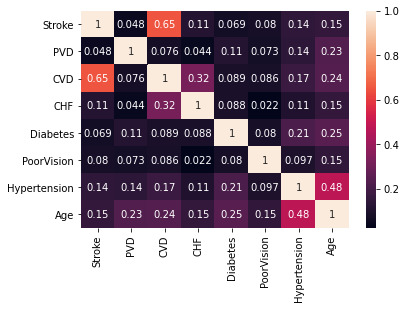

In [275]:
import seaborn as sns

sns.heatmap(original[final_cols].corr(),annot=True)
plt.show()

In [ ]:
# delete CVD since it is a confound feature

In [276]:
final_cols2=[x for x in final_cols if x!='CVD']

In [277]:
cv.fit(X_train[final_cols2],y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess', MinMaxScaler()),
                                       ('clf',
                                        BalancedBaggingClassifier(random_state=42))]),
             param_grid={'clf__base_estimator': [LogisticRegression(),
                                                 DecisionTreeClassifier()],
                         'clf__n_estimators': array([200, 300, 400])},
             scoring=make_scorer(roc_auc_score))

In [278]:
pd.DataFrame(cv.cv_results_)[['mean_test_score','std_test_score']]

,mean_test_score,std_test_score
0,0.815323,0.033713
1,0.815324,0.034064
2,0.814838,0.033380
3,0.776779,0.045945
4,0.777437,0.040347
5,0.775974,0.037736


In [279]:
y_pred=cv.predict(X_test[final_cols2])
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       775
           1       0.21      0.92      0.34        53

    accuracy                           0.77       828
   macro avg       0.60      0.84      0.60       828
weighted avg       0.94      0.77      0.83       828



In [ ]:
# choose the best threshold for best profits

In [280]:
from sklearn.metrics import confusion_matrix

In [289]:
def my_rev(y_test,y_est,profit1,profit2):
    tn,fn,fp,tp=confusion_matrix(y_test,y_est).ravel()
    revs=tn*profit1+tp*profit2
    return revs 

In [290]:
prob=cv.predict_proba(X_test[final_cols2])
thresholds=np.linspace(0,1,100)    

In [291]:
revenues=[]
for x in thresholds:
    preds=prob[:,1]>x
    rev=my_rev(y_test,preds,100,1300)
    revenues.append(rev)

In [295]:
best_threshhold=thresholds[np.argmax(revenues )]
print(best_threshhold)

0.5151515151515152


In [ ]:
# Impute missing values

In [7]:
none_ckd=uncleaned.CKD.isnull()
CKD_status=uncleaned[~none_ckd]

In [ ]:
# Analyze missing values

In [337]:
import missingno as msno

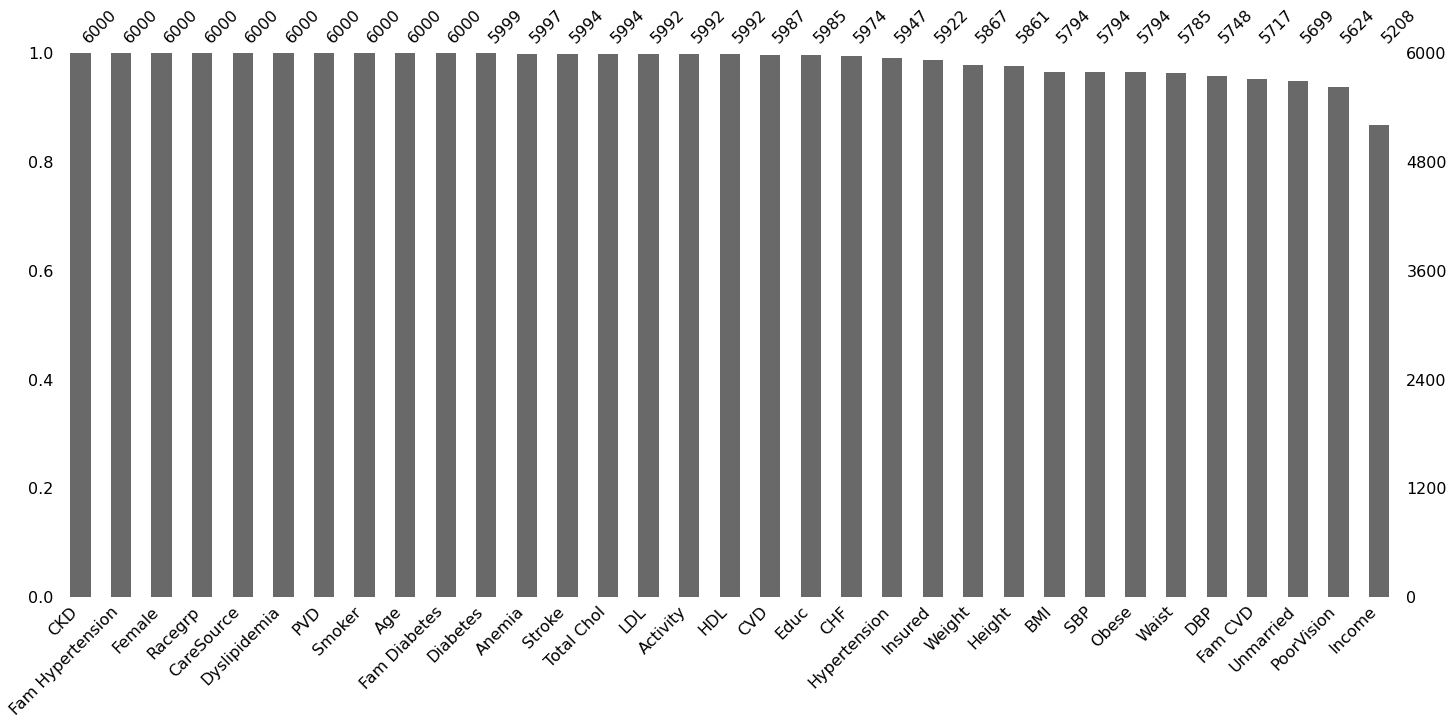

In [340]:
msno.bar(CKD_status,sort='descending')
plt.show()

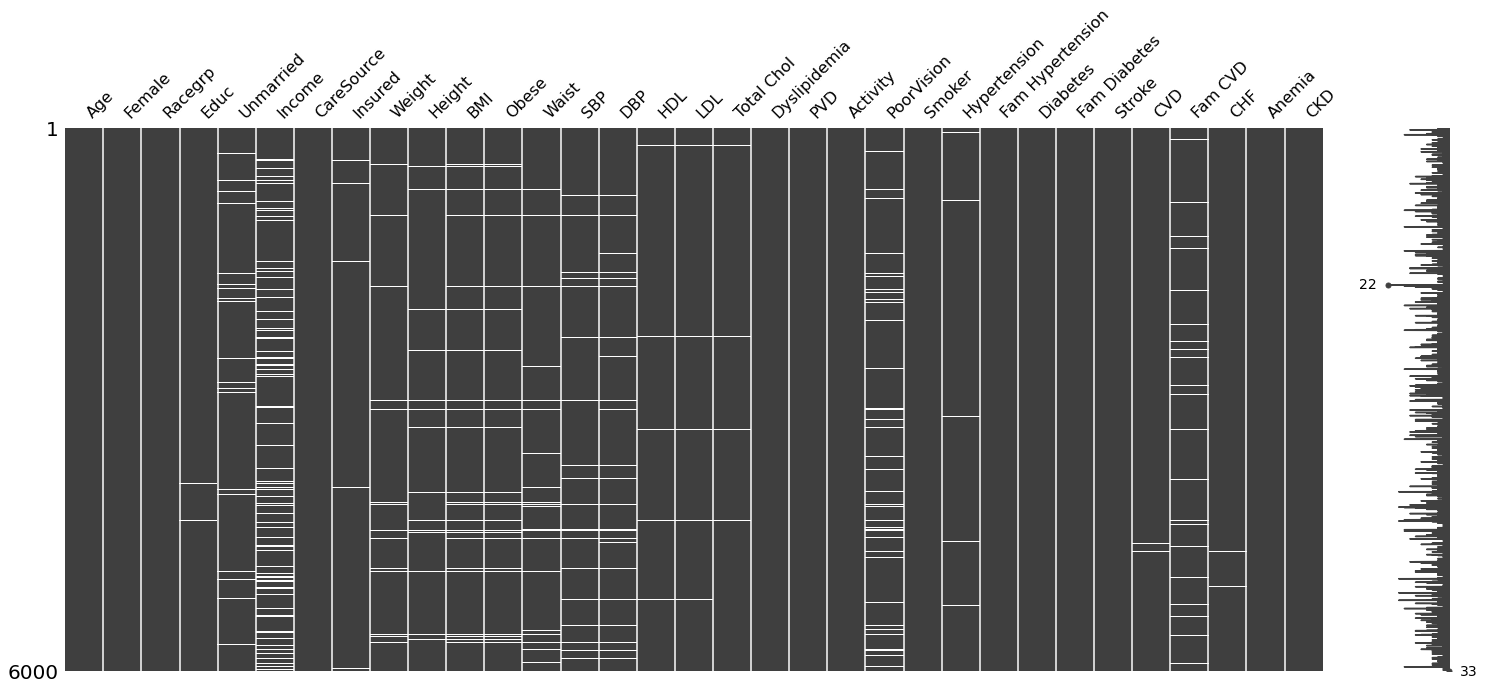

In [341]:
msno.matrix(CKD_status)
plt.show()

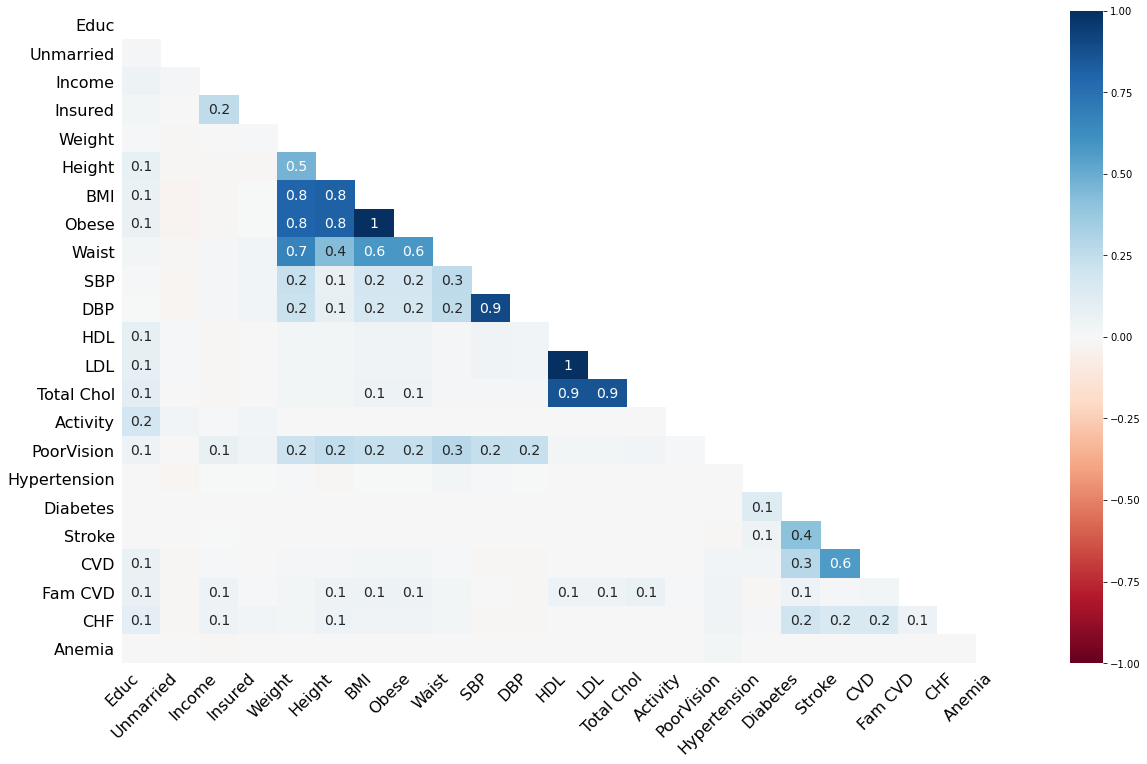

In [342]:
msno.heatmap(CKD_status)
plt.show()

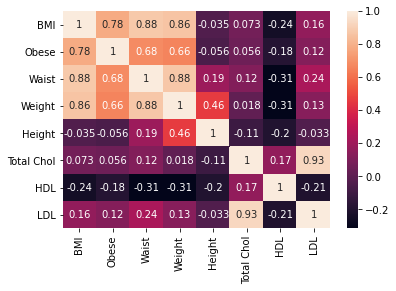

In [348]:
corrs=CKD_status[['BMI','Obese','Waist','Weight','Height','Total Chol','HDL','LDL']].corr()
sns.heatmap(corrs,annot=True)
plt.show()

In [459]:
test_inds=list(X_test.index)
X_use=CKD_status.drop(test_inds)
X_train2=X_use.drop('CKD',axis=1)
y_train2=X_use.CKD

In [460]:
print(len(X_train2))
print(len(y_train2))

5172
5172


In [111]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score,make_scorer
from sklearn.preprocessing import FunctionTransformer

In [644]:
cat_fea=list(CKD_status.select_dtypes(['object']).columns)
cat_fea

['Racegrp', 'CareSource']

In [ ]:
# USE PCA to reduce the dimension

In [749]:
from sklearn.preprocessing import LabelEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

In [819]:
x2=CKD_status.drop('CKD',axis=1)
y2=CKD_status.CKD

test_index=y2.index.isin(y_test.index)
X_train2=x2[~test_index]
y_train2=y2[~test_index]
X_test2=x2[test_index]
y_test2=y2[test_index]

In [820]:
preprocess=DataFrameMapper(
    [(x,LabelBinarizer()) for x in list(cat_fea)]+[([x],MinMaxScaler()) for x in conti_cols+['Activity']],
    df_out=True,default=None
)

In [821]:
 pipeline2=Pipeline([
    ('preprocess',preprocess),
    ('impute',KNNImputer()),
    ('fs',PCA(n_components=8)),
     ('clf',BalancedBaggingClassifier(base_estimator=LogisticRegression()))
])

In [822]:
params={'fs__n_components':[8,9]}

In [823]:
cv2=GridSearchCV(pipeline2,refit=True,param_grid=params,scoring=auc_score,cv=3)

In [824]:
cv2.fit(X_train2,y_train2)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        DataFrameMapper(default=None,
                                                        df_out=True,
                                                        drop_cols=[],
                                                        features=[('Racegrp',
                                                                   LabelBinarizer()),
                                                                  ('CareSource',
                                                                   LabelBinarizer()),
                                                                  (['Age'],
                                                                   MinMaxScaler()),
                                                                  (['Weight'],
                                                                   MinMaxScaler()),
                                                                

In [828]:
pred_prob2=cv2.predict_proba(X_test2)[:,1]
print(roc_auc_score(y_test2,pred_prob2))

0.8321367521367521


In [829]:
# use original final features instead of PCA

In [669]:
X_train_22=DataFrameMapper(
    [(x,LabelBinarizer())for x in list(cat_fea)],
default=None,df_out=True).fit_transform(X_train2)

In [670]:
final_cols=list(final_cols)

In [671]:
X_train_22=X_train_22[final_cols]

In [711]:
scaler=DataFrameMapper(
    [(['Age'],MinMaxScaler())]
    ,default=None
)

steps22=[
        ('scaler',scaler),
    ('impute',IterativeImputer()),
         ('clf',BalancedBaggingClassifier(base_estimator=LogisticRegression()))
        ]
pipeline22=Pipeline(steps22)

In [712]:
grid_params={'clf__n_estimators':np.arange(100,400,100)}

In [713]:
grid_cv=GridSearchCV(pipeline22,cv=10,refit=True,param_grid=grid_params,scoring=auc_score)

In [714]:
grid_cv.fit(X_train_22,y_train2)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler',
                                        DataFrameMapper(default=None,
                                                        drop_cols=[],
                                                        features=[(['Age'],
                                                                   MinMaxScaler())])),
                                       ('impute', IterativeImputer()),
                                       ('clf',
                                        BalancedBaggingClassifier(base_estimator=LogisticRegression()))]),
             param_grid={'clf__n_estimators': array([100, 200, 300])},
             scoring=make_scorer(roc_auc_score))

In [715]:
pred_prob=grid_cv.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,pred_prob))

0.9103225806451614


In [716]:
y_pred=grid_cv.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.78      0.87       775
         1.0       0.21      0.87      0.34        53

    accuracy                           0.79       828
   macro avg       0.60      0.82      0.61       828
weighted avg       0.94      0.79      0.84       828

